In [23]:
# import pandas as pd

# # Citirea fișierelor CSV (înlocuiește cu calea ta corectă)
# data1 = pd.read_csv("../data/Station-RO065-2022/Meteo+PFactors")
# data2 = pd.read_csv("../data/Station-RO0067A-2022/Meteo+PFactors")
# data3 = pd.read_csv("../data/Station-RO0070A-2022/Meteo+PFactors.csv")

# # Adăugăm o coloană de identificare pentru fiecare punct
# data1['location'] = 'Punct_1'
# data2['location'] = 'Punct_2'
# data3['location'] = 'Punct_3'


# # Concatenăm vertical și sortăm după timp și locație
# df_merged = pd.concat([data1, data2, data3], axis=0).sort_values(by=['start', 'location'])

# # Reordonăm coloanele pentru lizibilitate
# cols = ['start', 'end', 'location'] + [col for col in df_merged.columns if col not in ['start', 'end', 'location']]
# df_merged = df_merged[cols]

# # Grupăm pe "start" și intercalăm rândurile pentru fiecare oră
# final_df = pd.DataFrame()
# for _, group in df_merged.groupby('start'):
#     final_df = pd.concat([final_df, group])

# # Resetăm indexul pentru o mai bună lizibilitate
# final_df.reset_index(drop=True, inplace=True)

# # Salvăm 
# final_df.to_csv("../data/FinalDatasets/dataset_3stations_concated.csv", index=False)

# # Afișăm primele rânduri pentru verificare
# print(final_df.head(-4))


import pandas as pd

# Citirea fișierelor CSV (înlocuiește cu calea ta corectă)
data1 = pd.read_csv("../data/Station-RO065-2022/Meteo+PFactors")
data2 = pd.read_csv("../data/Station-RO0067A-2022/Meteo+PFactors")
data3 = pd.read_csv("../data/Station-RO0070A-2022/Meteo+PFactors.csv")

# Adăugăm o coloană de identificare pentru fiecare punct
data1['location'] = 'Crangasi'
data2['location'] = 'Piata Obor'
data3['location'] = 'Universitate'

# Concatenăm toate datele într-un singur DataFrame
df_merged = pd.concat([data1, data2, data3], axis=0)

# Sortăm după 'start' și 'location' pentru lizibilitate
df_merged = df_merged.sort_values(by=['start', 'location'])

# Grupăm pe 'start' și păstrăm doar cazurile în care toate cele trei puncte sunt prezente
filtered_groups = []
for start, group in df_merged.groupby('start'):
    # Verificăm dacă avem toate cele trei locații în grup
    if len(group['location'].unique()) == 3:
        filtered_groups.append(group)

# Concatenăm grupurile filtrate
final_df = pd.concat(filtered_groups)

# Resetăm indexul pentru o mai bună lizibilitate
final_df.reset_index(drop=True, inplace=True)

# Salvăm dataset-ul final
# final_df.to_csv("../data/FinalDatasets/dataset_3stations_interpolated.csv", index=False)

# ✅ Afișăm primele rânduri pentru verificare
print(f"✅ Dataset final cu {len(final_df)} rânduri comune (cu toate cele trei puncte).")
final_df.head(10)



✅ Dataset final cu 19857 rânduri comune (cu toate cele trei puncte).


,start,end,pm10,pm2_5,no2,temperature,humidity,wind_speed,pressure,longitude,latitude,location
0,2022-01-02 00:00:00,2022-01-02 01:00:00,46.48,42.360000,30.20,4.8,100.0,7.2,1021.3,26.140600,44.426400,Crangasi
1,2022-01-02 00:00:00,2022-01-02 01:00:00,43.33,32.427825,44.18,4.8,100.0,7.2,1021.3,26.127289,44.444925,Piata Obor
2,2022-01-02 00:00:00,2022-01-02 01:00:00,49.69,37.187598,35.06,4.8,100.0,7.2,1021.3,26.127289,44.444925,Universitate
3,2022-01-02 01:00:00,2022-01-02 02:00:00,33.50,30.730000,18.84,3.6,100.0,3.6,1021.8,26.140600,44.426400,Crangasi
4,2022-01-02 01:00:00,2022-01-02 02:00:00,10.62,7.947923,31.10,3.6,100.0,3.6,1021.8,26.127289,44.444925,Piata Obor
5,2022-01-02 01:00:00,2022-01-02 02:00:00,13.41,10.035937,22.63,3.6,100.0,3.6,1021.8,26.127289,44.444925,Universitate
6,2022-01-02 02:00:00,2022-01-02 03:00:00,19.34,17.390000,16.96,2.9,100.0,3.6,1021.8,26.140600,44.426400,Crangasi
7,2022-01-02 02:00:00,2022-01-02 03:00:00,7.31,5.470746,27.79,2.9,100.0,3.6,1021.8,26.127289,44.444925,Piata Obor
8,2022-01-02 02:00:00,2022-01-02 03:00:00,11.00,8.232312,21.19,2.9,100.0,3.6,1021.8,26.127289,44.444925,Universitate
9,2022-01-02 03:00:00,2022-01-02 04:00:00,14.99,12.920000,14.68,2.7,100.0,3.6,1022.1,26.140600,44.426400,Crangasi


In [25]:
# Noile valori pentru Punct_1
new_latitude_1 = 44.447275
new_longitude_1 = 26.036694

# Noile valori pentru Punct_3
new_latitude_3 = 44.435044
new_longitude_3 = 26.098297

# Modificăm doar valorile pentru Punct_1
final_df.loc[final_df['location'] == 'Crangasi', 'latitude'] = new_latitude_1
final_df.loc[final_df['location'] == 'Crangasi', 'longitude'] = new_longitude_1

# Modificăm doar valorile pentru Punct_3
final_df.loc[final_df['location'] == 'Universitate', 'latitude'] = new_latitude_3
final_df.loc[final_df['location'] == 'Universitate', 'longitude'] = new_longitude_3

final_df.to_csv("../data/FinalDatasets/dataset_3stations_interpolated.csv", index=False)

# Verificăm modificările
final_df


,start,end,pm10,pm2_5,no2,temperature,humidity,wind_speed,pressure,longitude,latitude,location
0,2022-01-02 00:00:00,2022-01-02 01:00:00,46.48,42.360000,30.20,4.8,100.0,7.2,1021.3,26.036694,44.447275,Crangasi
1,2022-01-02 00:00:00,2022-01-02 01:00:00,43.33,32.427825,44.18,4.8,100.0,7.2,1021.3,26.127289,44.444925,Piata Obor
2,2022-01-02 00:00:00,2022-01-02 01:00:00,49.69,37.187598,35.06,4.8,100.0,7.2,1021.3,26.098297,44.435044,Universitate
3,2022-01-02 01:00:00,2022-01-02 02:00:00,33.50,30.730000,18.84,3.6,100.0,3.6,1021.8,26.036694,44.447275,Crangasi
4,2022-01-02 01:00:00,2022-01-02 02:00:00,10.62,7.947923,31.10,3.6,100.0,3.6,1021.8,26.127289,44.444925,Piata Obor
...,...,...,...,...,...,...,...,...,...,...,...,...
19852,2022-12-21 04:00:00,2022-12-21 05:00:00,24.68,18.597614,18.29,-3.3,99.0,10.8,1027.5,26.127289,44.444925,Piata Obor
19853,2022-12-21 04:00:00,2022-12-21 05:00:00,35.19,26.517425,17.65,-3.3,99.0,10.8,1027.5,26.098297,44.435044,Universitate
19854,2022-12-21 05:00:00,2022-12-21 06:00:00,21.42,17.410000,16.81,-3.1,98.0,7.2,1027.1,26.036694,44.447275,Crangasi
19855,2022-12-21 05:00:00,2022-12-21 06:00:00,23.14,17.437147,21.16,-3.1,98.0,7.2,1027.1,26.127289,44.444925,Piata Obor


In [26]:
from meteostat import Hourly, Stations
from datetime import datetime
import pandas as pd

In [27]:
data = pd.read_csv("../data/FinalDatasets/dataset_3stations_interpolated.csv")
data

,start,end,pm10,pm2_5,no2,temperature,humidity,wind_speed,pressure,longitude,latitude,location
0,2022-01-02 00:00:00,2022-01-02 01:00:00,46.48,42.360000,30.20,4.8,100.0,7.2,1021.3,26.036694,44.447275,Crangasi
1,2022-01-02 00:00:00,2022-01-02 01:00:00,43.33,32.427825,44.18,4.8,100.0,7.2,1021.3,26.127289,44.444925,Piata Obor
2,2022-01-02 00:00:00,2022-01-02 01:00:00,49.69,37.187598,35.06,4.8,100.0,7.2,1021.3,26.098297,44.435044,Universitate
3,2022-01-02 01:00:00,2022-01-02 02:00:00,33.50,30.730000,18.84,3.6,100.0,3.6,1021.8,26.036694,44.447275,Crangasi
4,2022-01-02 01:00:00,2022-01-02 02:00:00,10.62,7.947923,31.10,3.6,100.0,3.6,1021.8,26.127289,44.444925,Piata Obor
...,...,...,...,...,...,...,...,...,...,...,...,...
19852,2022-12-21 04:00:00,2022-12-21 05:00:00,24.68,18.597614,18.29,-3.3,99.0,10.8,1027.5,26.127289,44.444925,Piata Obor
19853,2022-12-21 04:00:00,2022-12-21 05:00:00,35.19,26.517425,17.65,-3.3,99.0,10.8,1027.5,26.098297,44.435044,Universitate
19854,2022-12-21 05:00:00,2022-12-21 06:00:00,21.42,17.410000,16.81,-3.1,98.0,7.2,1027.1,26.036694,44.447275,Crangasi
19855,2022-12-21 05:00:00,2022-12-21 06:00:00,23.14,17.437147,21.16,-3.1,98.0,7.2,1027.1,26.127289,44.444925,Piata Obor


In [11]:
# Reorder columns
# data = data[[
#     "start", "end",
#     "pm10", "pm2_5", "no2",
#     "temperature", "humidity", "wind_speed", "pressure",
#     "longitude", "latitude"
# ]]

In [12]:
### Data statistics

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19857 entries, 0 to 19856
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   start        19857 non-null  object 
 1   end          19857 non-null  object 
 2   pm10         19857 non-null  float64
 3   pm2_5        19857 non-null  float64
 4   no2          19857 non-null  float64
 5   temperature  19857 non-null  float64
 6   humidity     19857 non-null  float64
 7   wind_speed   19857 non-null  float64
 8   pressure     19857 non-null  float64
 9   longitude    19857 non-null  float64
 10  latitude     19857 non-null  float64
 11  location     19857 non-null  object 
dtypes: float64(9), object(3)
memory usage: 1.8+ MB


In [29]:
data.describe()

,pm10,pm2_5,no2,temperature,humidity,wind_speed,pressure,longitude,latitude
count,19857.000000,19857.000000,19857.000000,19857.000000,19857.000000,19857.000000,19857.000000,19857.000000,19857.000000
mean,25.595651,15.009997,33.158385,13.735428,65.718991,4.489878,1017.696193,26.087427,44.442415
std,14.667107,9.310805,19.906548,9.860817,21.661377,3.327840,8.015892,0.037776,0.005300
min,1.280000,0.080000,0.170000,-6.600000,13.000000,0.000000,993.300000,26.036694,44.435044
25%,16.300000,9.080000,17.930000,5.300000,48.000000,3.600000,1012.500000,26.036694,44.435044
50%,22.780000,12.810000,29.870000,13.500000,66.000000,3.600000,1016.700000,26.098297,44.444925
75%,31.190000,18.440000,44.890000,21.400000,84.000000,7.200000,1022.800000,26.127289,44.447275
max,338.610000,120.524969,172.920000,39.600000,100.000000,23.400000,1044.100000,26.127289,44.447275


In [30]:
data.isna().sum()

start          0
end            0
pm10           0
pm2_5          0
no2            0
temperature    0
humidity       0
wind_speed     0
pressure       0
longitude      0
latitude       0
location       0
dtype: int64

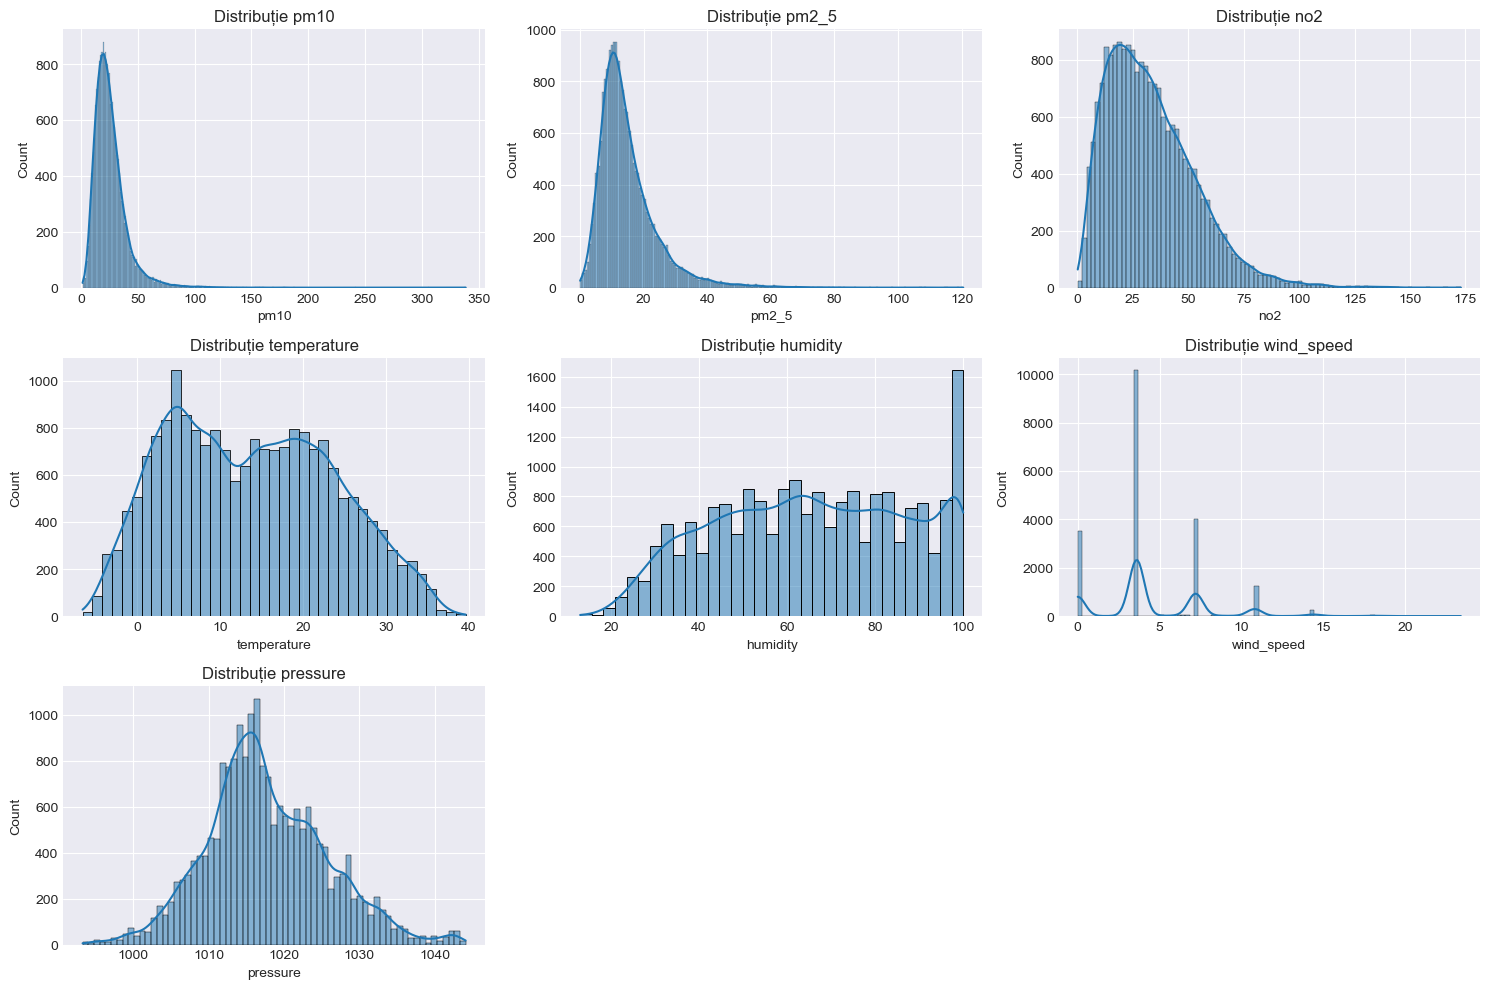

In [31]:
## Vizualizare distribuție pentru fiecare factor
# Folosim histograme și boxplots pentru a observa distribuția și anomaliile.
# Ne ajută să vedem dacă datele sunt skewed sau dacă există outliers.

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
for i, col in enumerate(['pm10', 'pm2_5', 'no2', 'temperature', 'humidity', 'wind_speed', 'pressure']):
    plt.subplot(3, 3, i + 1)
    sns.histplot(data[col], kde=True)
    plt.title(f"Distribuție {col}")

plt.tight_layout()
plt.show()


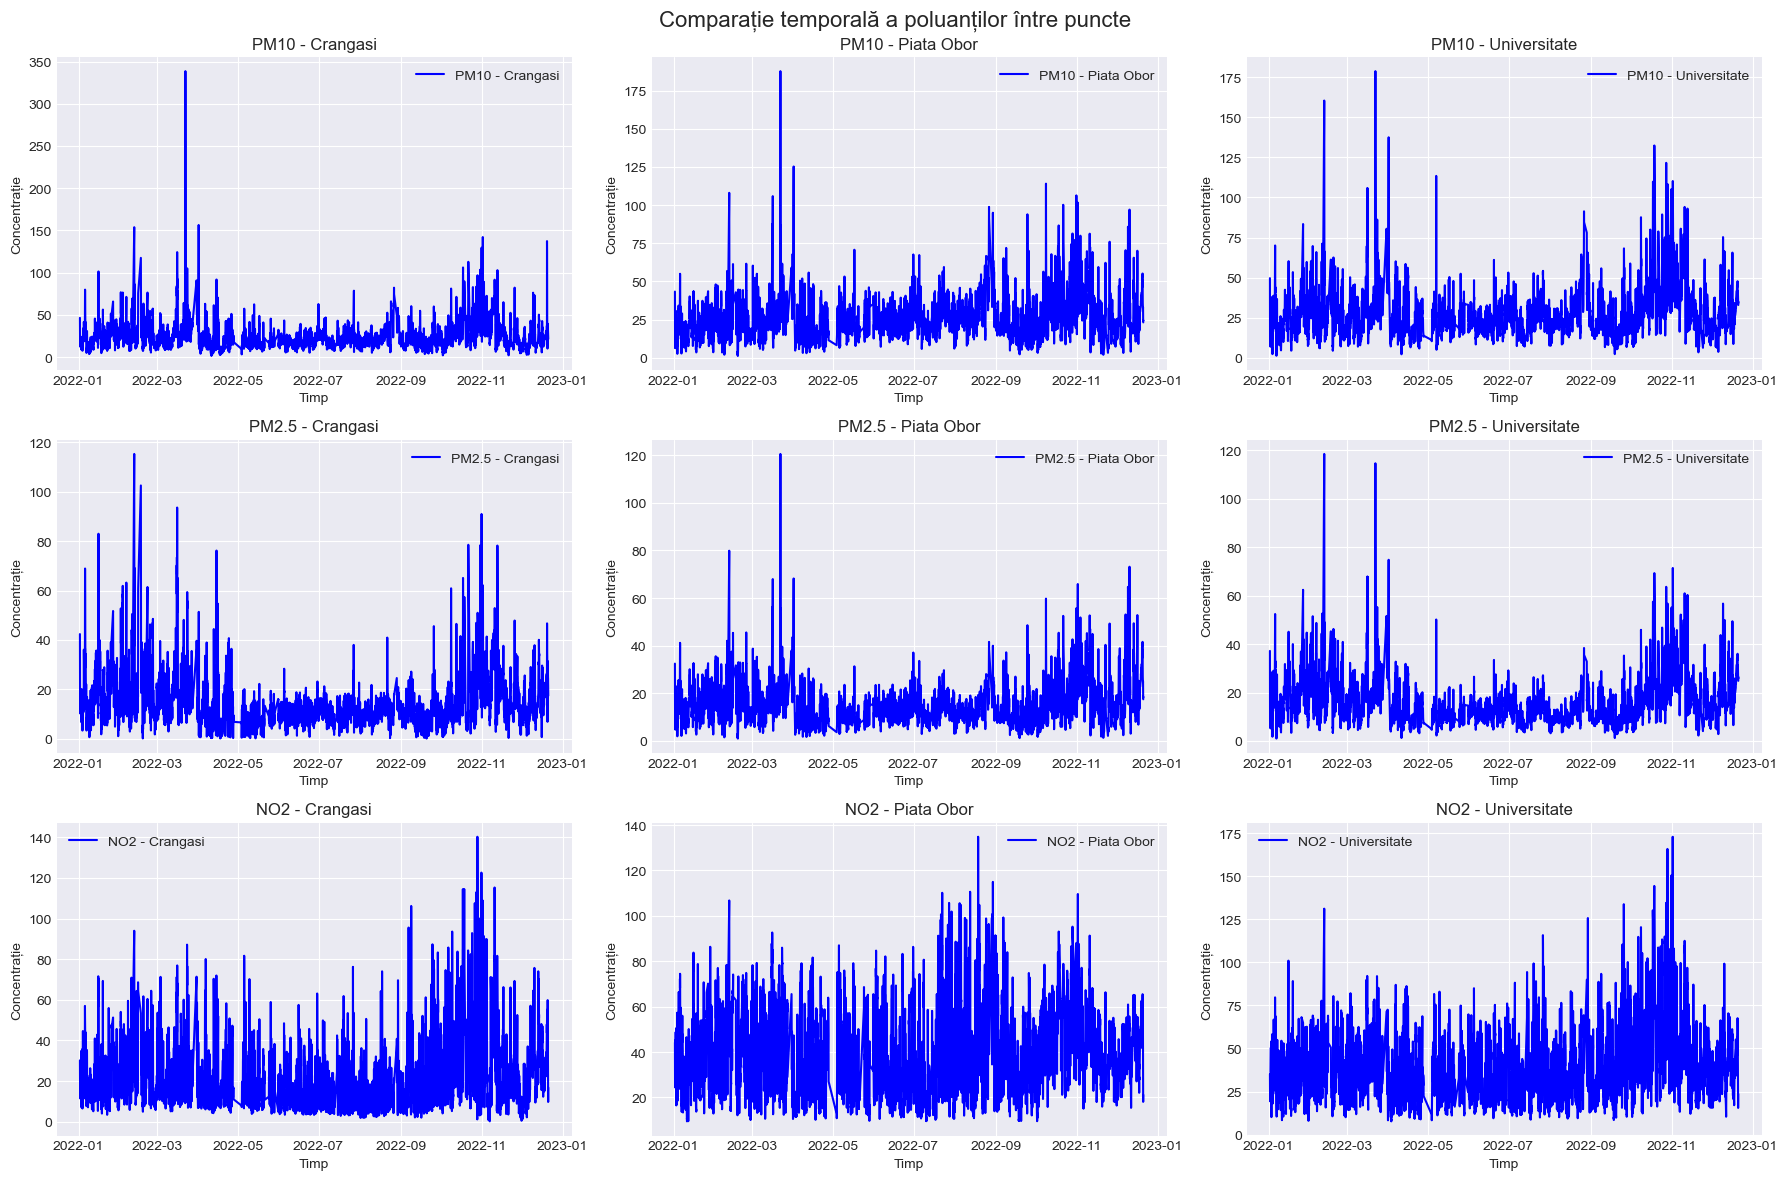

In [32]:
## Analiză temporală
# Plotăm valorile în funcție de timp pentru fiecare punct și pentru fiecare factor.
# Putem observa sezonalități sau trenduri zilnice și săptămânale.

import matplotlib.pyplot as plt
import pandas as pd

# Transformăm coloana "start" în datetime pentru a putea plota corect
data["start"] = pd.to_datetime(data["start"])

# Setăm stilul și dimensiunea figurii
plt.style.use('seaborn-darkgrid')
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
fig.suptitle('Comparație temporală a poluanților între puncte', fontsize=16)

# Dicționar pentru etichete
labels = {
    'pm10': 'PM10',
    'pm2_5': 'PM2.5',
    'no2': 'NO2'
}

# Iterăm prin poluanți și puncte și plotăm pe subplot-uri separate
for idx, factor in enumerate(['pm10', 'pm2_5', 'no2']):
    for jdx, location in enumerate(data['location'].unique()):
        subset = data[data['location'] == location]
        axes[idx, jdx].plot(subset['start'], subset[factor], label=f'{labels[factor]} - {location}', color='blue')
        axes[idx, jdx].set_title(f'{labels[factor]} - {location}')
        axes[idx, jdx].legend()
        axes[idx, jdx].set_xlabel('Timp')
        axes[idx, jdx].set_ylabel('Concentrație')

# Ajustăm layout-ul pentru a evita suprapuneri
plt.tight_layout()
plt.show()



In [ ]:
## Analiză temporală și observații:

# PM10:
#Crangasi pare să aibă spike-uri mari, mai ales în prima parte a anului și spre finalul lui 2022.
#Piata Obor are spike-uri mai constante, dar de intensitate mai mică.
#Universitate are multe spike-uri de intensitate moderată, cu o variație mai controlată.

# PM2.5:
#Crangasi are din nou spike-uri mari, și pare să fie o zonă mai expusă la particule fine.
#Piata Obor pare destul de constantă, cu spike-uri distribuite uniform.
#Universitate are variații vizibile, dar mai moderate față de Crangasi.

# NO2:
#Se observă o creștere puternică în toate cele trei locații pe măsură ce se apropie toamna și iarna (probabil din cauza traficului mai intens și a arderilor de combustibil pentru încălzire).
#Crangasi din nou iese în evidență prin valori foarte ridicate, mai ales în perioada rece.

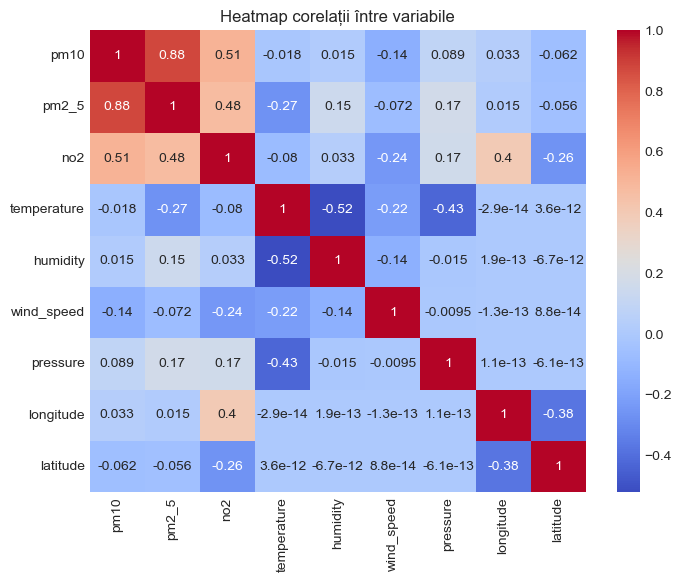

In [33]:
## Corelații între variabile
# Calculăm corelațiile dintre factorii de poluare și condițiile meteo.
# Ne ajută să vedem dacă, de exemplu, creșterea temperaturii afectează nivelul de poluare.

plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Heatmap corelații între variabile")
plt.show()


In [34]:
## Heatmap Observatii
#PM10 și PM2.5 sunt foarte corelate între ele (0.88), ceea ce este de așteptat, deoarece ambele sunt particule în suspensie.
#NO2 are o corelație interesantă cu longitudinea (0.4), ceea ce sugerează că în anumite zone, poluarea cu NO2 este mai intensă.
#Temperature pare să aibă o corelație negativă moderată cu PM2.5 și PM10, ceea ce ar putea sugera că în zilele mai calde, concentrația de particule este mai mică (poate din cauza dispersiei mai eficiente).

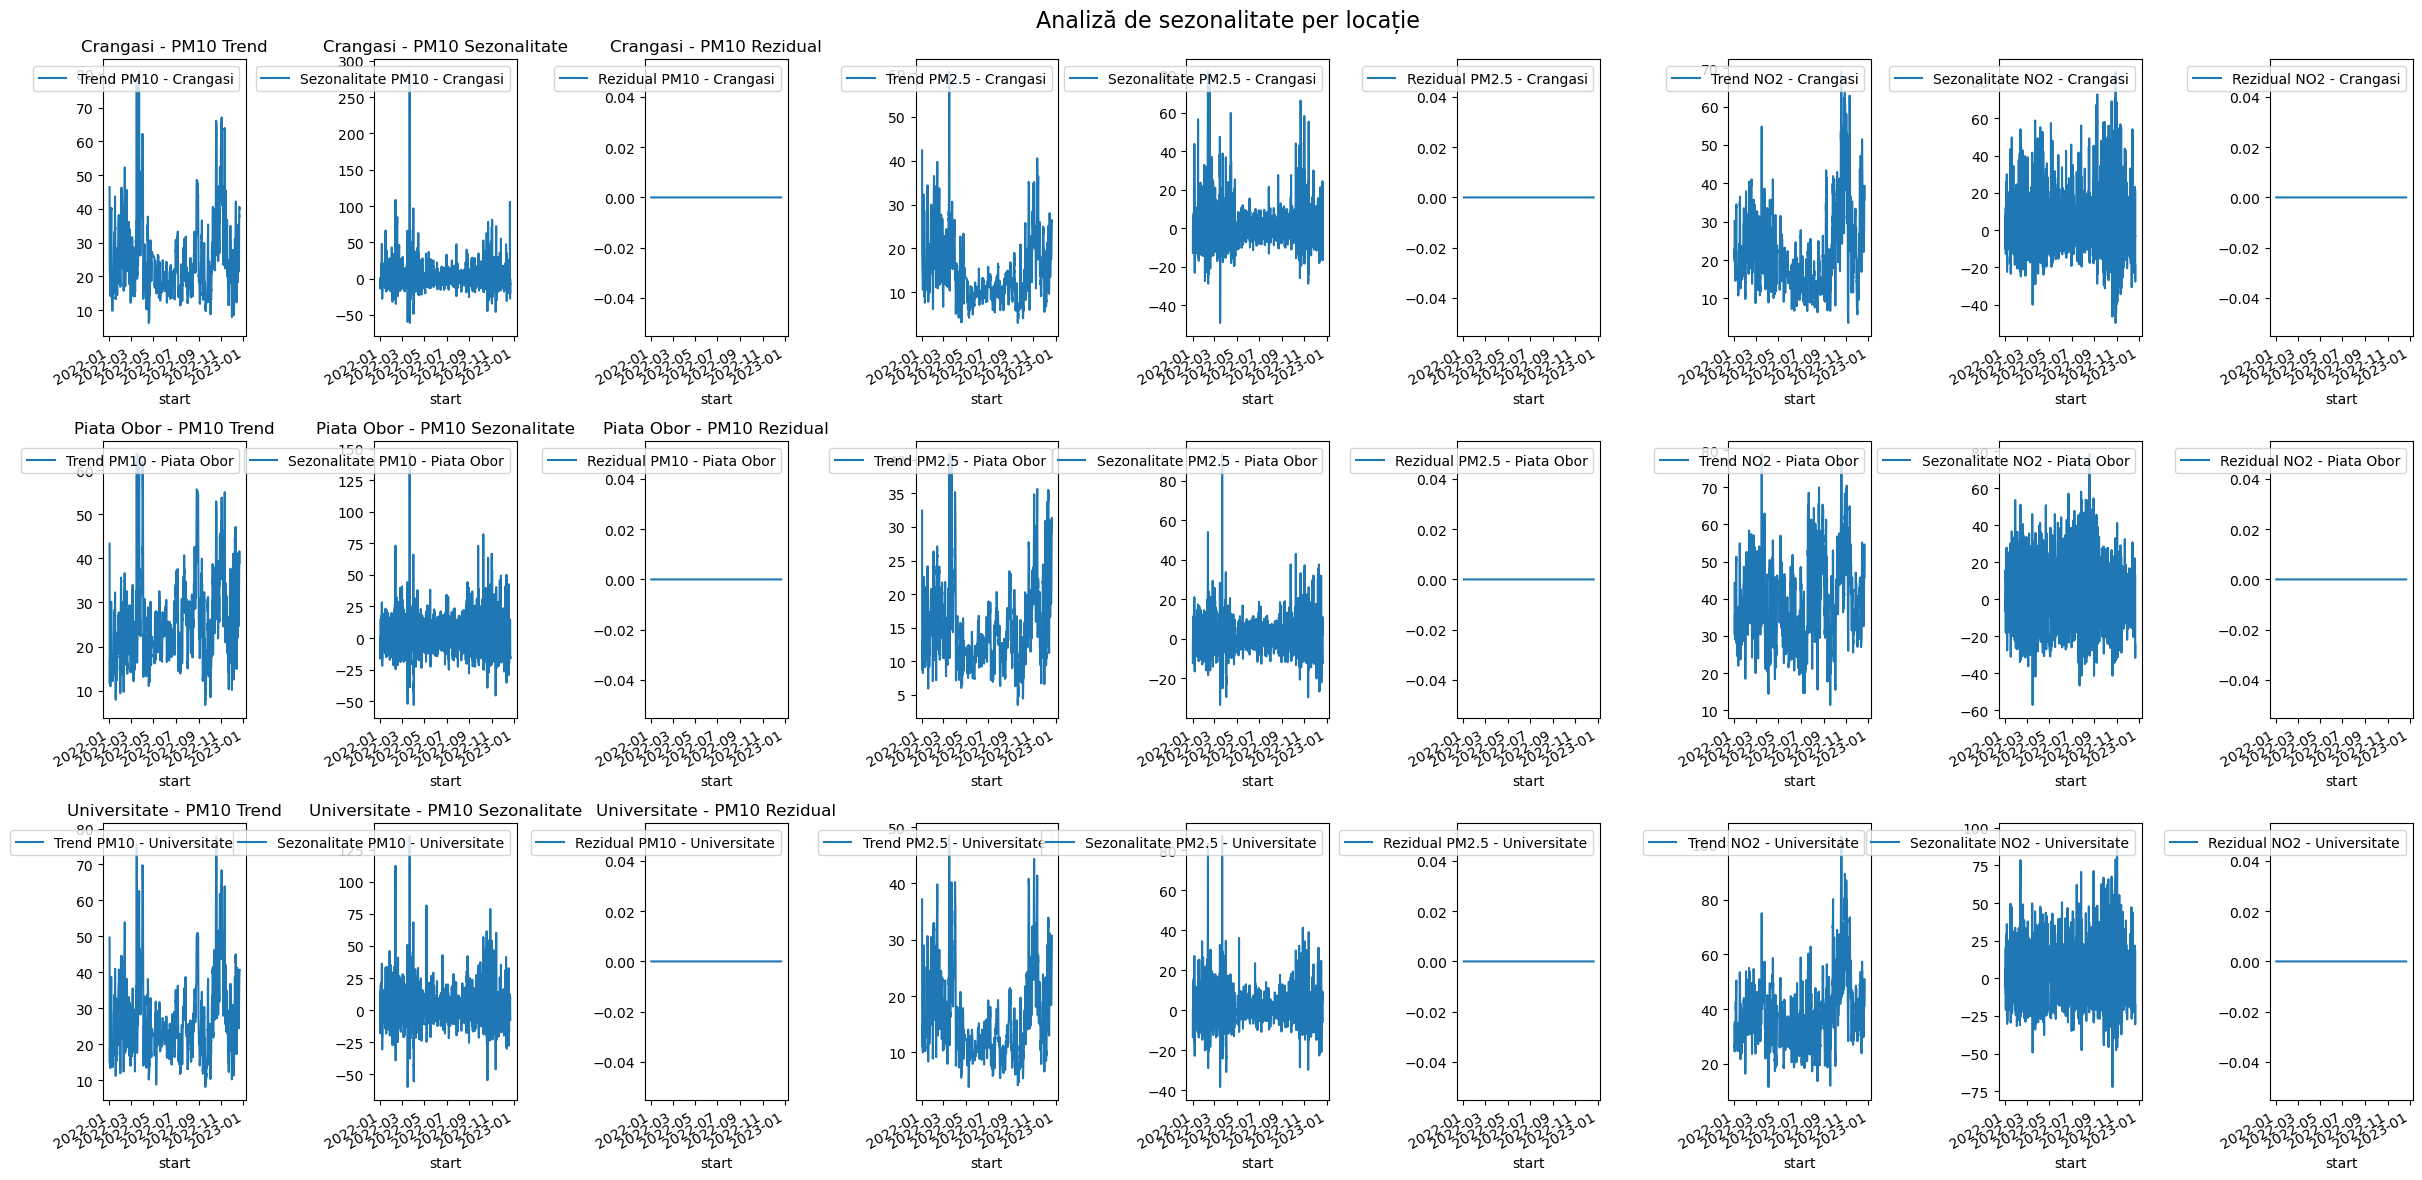

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Filtrare pe fiecare locație
locations = data['location'].unique()

# Inițializare subploturi
fig, axes = plt.subplots(nrows=3, ncols=9, figsize=(24, 12))
fig.suptitle("Analiză de sezonalitate per locație", fontsize=16)

# Plot decompoziție pentru fiecare locație și poluant
for i, loc in enumerate(locations):
    loc_data = data[data['location'] == loc].copy()
    loc_data.set_index('start', inplace=True)

    # === PM10 ===
    loc_data['pm10_trend'] = loc_data['pm10'].rolling(window=24, min_periods=1).mean()
    loc_data['pm10_seasonal'] = loc_data['pm10'] - loc_data['pm10_trend']
    loc_data['pm10_residual'] = loc_data['pm10'] - loc_data['pm10_trend'] - loc_data['pm10_seasonal']

    loc_data['pm10_trend'].plot(ax=axes[i, 0], label=f'Trend PM10 - {loc}', legend=True)
    loc_data['pm10_seasonal'].plot(ax=axes[i, 1], label=f'Sezonalitate PM10 - {loc}', legend=True)
    loc_data['pm10_residual'].plot(ax=axes[i, 2], label=f'Rezidual PM10 - {loc}', legend=True)

    axes[i, 0].set_title(f'{loc} - PM10 Trend')
    axes[i, 1].set_title(f'{loc} - PM10 Sezonalitate')
    axes[i, 2].set_title(f'{loc} - PM10 Rezidual')

    # === PM2.5 ===
    loc_data['pm2_5_trend'] = loc_data['pm2_5'].rolling(window=24, min_periods=1).mean()
    loc_data['pm2_5_seasonal'] = loc_data['pm2_5'] - loc_data['pm2_5_trend']
    loc_data['pm2_5_residual'] = loc_data['pm2_5'] - loc_data['pm2_5_trend'] - loc_data['pm2_5_seasonal']

    loc_data['pm2_5_trend'].plot(ax=axes[i, 3], label=f'Trend PM2.5 - {loc}', legend=True)
    loc_data['pm2_5_seasonal'].plot(ax=axes[i, 4], label=f'Sezonalitate PM2.5 - {loc}', legend=True)
    loc_data['pm2_5_residual'].plot(ax=axes[i, 5], label=f'Rezidual PM2.5 - {loc}', legend=True)

    # === NO2 ===
    loc_data['no2_trend'] = loc_data['no2'].rolling(window=24, min_periods=1).mean()
    loc_data['no2_seasonal'] = loc_data['no2'] - loc_data['no2_trend']
    loc_data['no2_residual'] = loc_data['no2'] - loc_data['no2_trend'] - loc_data['no2_seasonal']

    loc_data['no2_trend'].plot(ax=axes[i, 6], label=f'Trend NO2 - {loc}', legend=True)
    loc_data['no2_seasonal'].plot(ax=axes[i, 7], label=f'Sezonalitate NO2 - {loc}', legend=True)
    loc_data['no2_residual'].plot(ax=axes[i, 8], label=f'Rezidual NO2 - {loc}', legend=True)

plt.tight_layout()
plt.show()



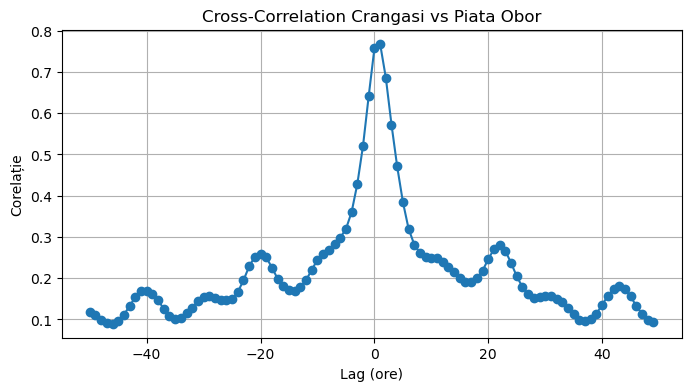

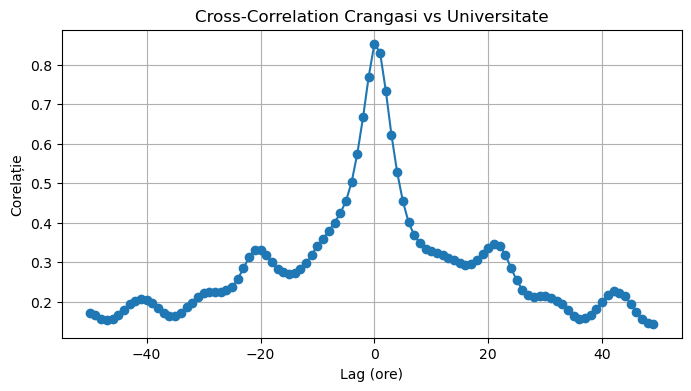

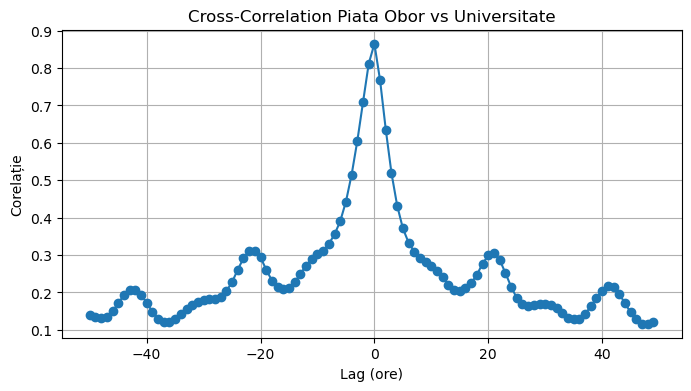

In [5]:
## Cross-Correlation Analysis

import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import correlate
import numpy as np

# Setează indexul pentru a putea face lag analysis
data.set_index('start', inplace=True)

# Grupare pe locație
crangasi = data[data['location'] == 'Crangasi']['pm10']
piata_obor = data[data['location'] == 'Piata Obor']['pm10']
universitate = data[data['location'] == 'Universitate']['pm10']

# Funcție pentru plot Cross-Correlation
def plot_cross_correlation(series1, series2, title):
    lags = np.arange(-50, 50, 1)
    correlation = [series1.corr(series2.shift(lag)) for lag in lags]
    plt.figure(figsize=(8, 4))
    plt.plot(lags, correlation, marker='o')
    plt.title(title)
    plt.xlabel('Lag (ore)')
    plt.ylabel('Corelație')
    plt.grid()
    plt.show()

# Cross-Correlation plots
plot_cross_correlation(crangasi, piata_obor, 'Cross-Correlation Crangasi vs Piata Obor')
plot_cross_correlation(crangasi, universitate, 'Cross-Correlation Crangasi vs Universitate')
plot_cross_correlation(piata_obor, universitate, 'Cross-Correlation Piata Obor vs Universitate')


In [ ]:
## Observații 

# Crângași vs Piața Obor:
#Corelația maximă se atinge la lag = 0 ore. Asta sugerează că spike-urile se produc aproape în același timp în ambele locații.
#Există și o ușoară undă de corelație la -10 ore și +10 ore, ceea ce ar putea sugera fluxuri de poluare care se deplasează între zone la diferite intervale.

# Crângași vs Universitate:
#Din nou, corelația maximă este în jur de 0 ore, cu o mică oscilație înainte și după.
#Asta arată că sunt afectate în același timp de creșteri de poluare, posibil din cauza traficului intens sau a condițiilor atmosferice.

# Piața Obor vs Universitate:
#Tot în jur de 0 ore corelația este maximă, ceea ce denotă sincronizare între aceste puncte.

# Concluzie:
#Faptul că toate locațiile au o corelație maximă în jurul valorii de 0 ore arată că evenimentele de poluare sunt aproape simultane în toate cele trei puncte.
#Acest lucru poate fi explicat prin fenomene comune precum:
#Trafic de dimineață și seară în toate zonele.
#Vânturi care distribuie poluanții în mod egal.
#Condiții atmosferice similare în București, care influențează în același timp toate locațiile.

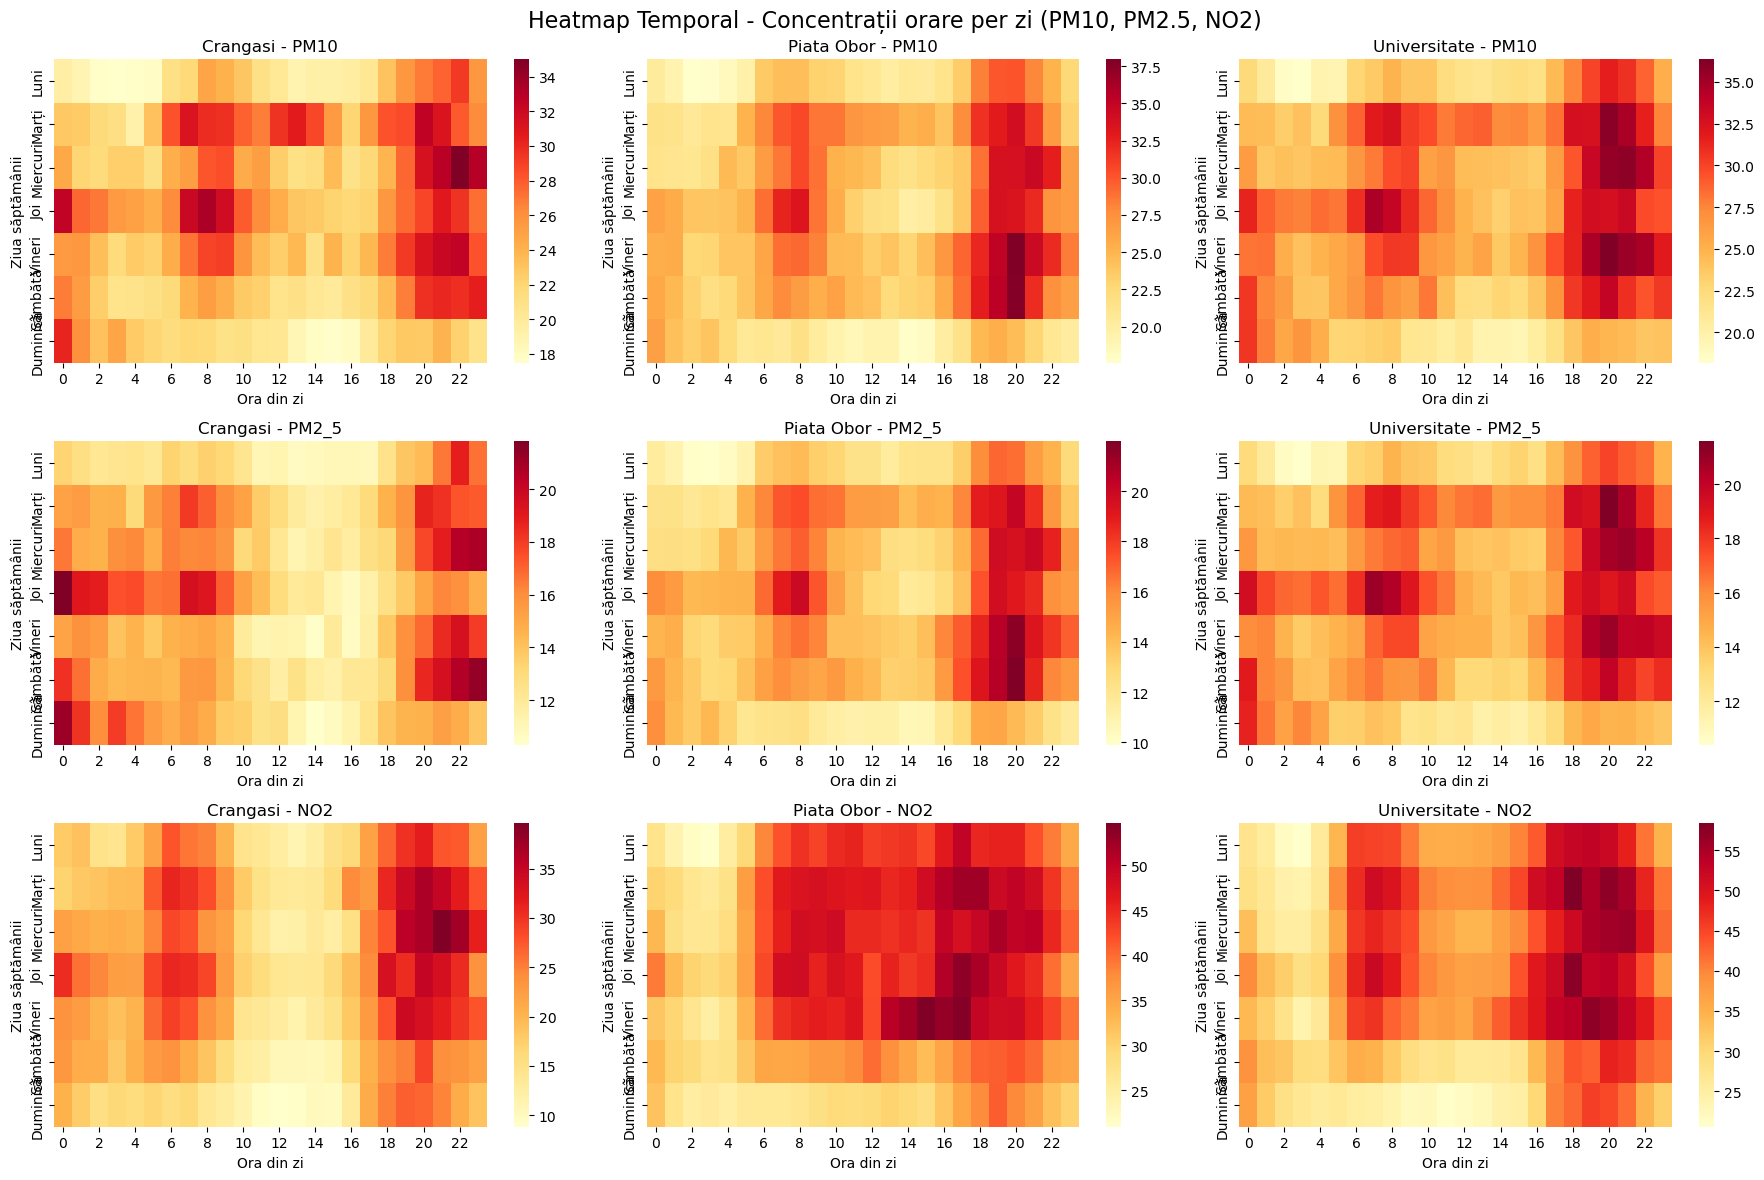

In [13]:
## Heatmap Temporal

# Voi calcula media orară pentru fiecare zi și fiecare locație.
# Plotăm un heatmap pentru a observa spike-urile și perioadele de vârf.

import seaborn as sns
import matplotlib.pyplot as plt

# Extragem ora și ziua săptămânii
data['hour'] = data.index.hour
data['day_of_week'] = data.index.dayofweek


# Inițializare subploturi
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 12))
fig.suptitle("Heatmap Temporal - Concentrații orare per zi (PM10, PM2.5, NO2)", fontsize=16)

locations = ['Crangasi', 'Piata Obor', 'Universitate']
pollutants = ['pm10', 'pm2_5', 'no2']

# Heatmap pentru fiecare locație și fiecare poluant
for i, loc in enumerate(locations):
    for j, pol in enumerate(pollutants):
        loc_data = data[data['location'] == loc]
        pivot = loc_data.pivot_table(values=pol, index='day_of_week', columns='hour', aggfunc='mean')
        sns.heatmap(pivot, cmap='YlOrRd', ax=axes[j, i])
        axes[j, i].set_title(f'{loc} - {pol.upper()}')
        axes[j, i].set_xlabel('Ora din zi')
        axes[j, i].set_ylabel('Ziua săptămânii')
        axes[j, i].set_yticklabels(['Luni', 'Marți', 'Miercuri', 'Joi', 'Vineri', 'Sâmbătă', 'Duminică'])

plt.tight_layout()
plt.show()


In [7]:
## Observatii:
#Există un pattern bine definit în toate cele trei locații, corelat cu orele de vârf și activitățile urbane.
#În zilele de Joi și Vineri poluarea este mai accentuată, sugerând un volum mai mare de trafic.(pe final de zi) si marti toata o buna parte din zi

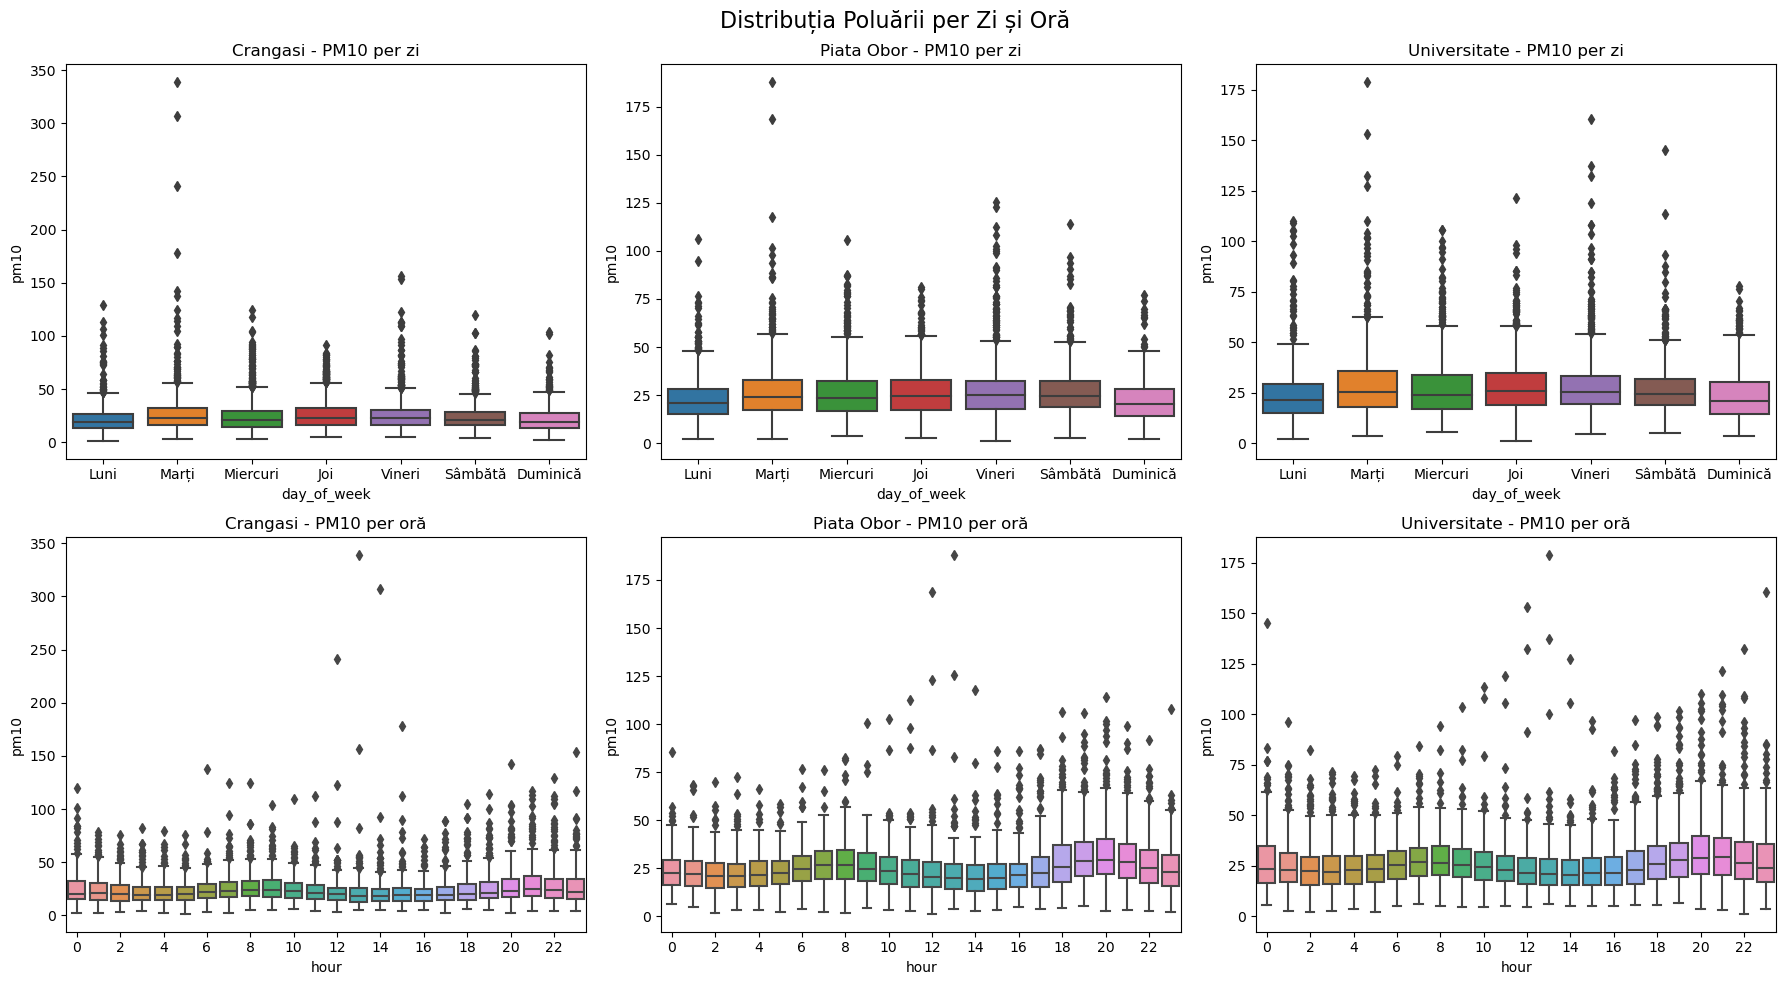

In [9]:
## Boxplot pe zilele săptămânii și pe ore
# Voi crea boxplot-uri pentru fiecare locație și pentru fiecare zi a săptămânii și oră, ca să vedem distribuțiile complete.

import seaborn as sns

# Extragem ziua săptămânii și ora din index
data['day_of_week'] = data.index.dayofweek
data['hour'] = data.index.hour

# Inițializare subploturi
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
fig.suptitle("Distribuția Poluării per Zi și Oră", fontsize=16)

locations = ['Crangasi', 'Piata Obor', 'Universitate']

# Plot pentru fiecare locație
for i, loc in enumerate(locations):
    loc_data = data[data['location'] == loc]
    sns.boxplot(x='day_of_week', y='pm10', data=loc_data, ax=axes[0, i])
    axes[0, i].set_title(f'{loc} - PM10 per zi')
    axes[0, i].set_xticklabels(['Luni', 'Marți', 'Miercuri', 'Joi', 'Vineri', 'Sâmbătă', 'Duminică'])

    sns.boxplot(x='hour', y='pm10', data=loc_data, ax=axes[1, i])
    axes[1, i].set_title(f'{loc} - PM10 per oră')
    axes[1, i].set_xticks(range(0, 24, 2))

plt.tight_layout()
plt.show()


In [ ]:
## Observatii Boxplot pe zilele săptămânii și ore:
# Zilele săptămânii:
#Se observă valori extreme mai frecvent în zilele saptamanii. Acestea sunt zilele în care traficul este cel mai intens, iar poluarea crește semnificativ.

# Orele din zi:
#6-9 AM și 18-20 PM sunt clar cele mai poluate intervale. Acestea coincid perfect cu orele de vârf din trafic.
#La Universitate, se observă un "val" constant între 8-12, probabil din cauza traficului și activităților universitare.

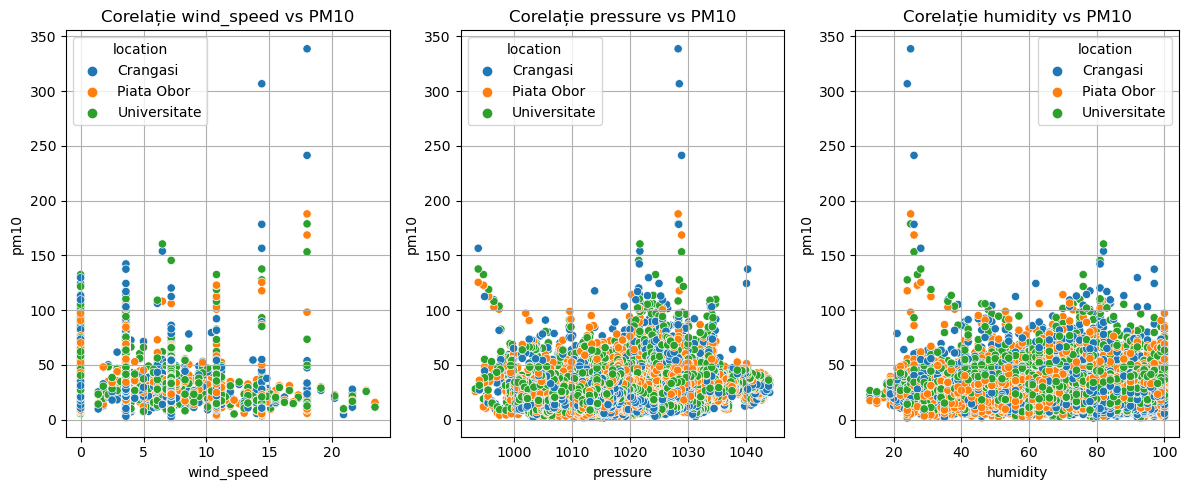

In [10]:
# Corelații între factorii de poluare și condițiile meteo
meteo_features = ['wind_speed', 'pressure', 'humidity']

plt.figure(figsize=(12, 5))
for i, feature in enumerate(meteo_features):
    plt.subplot(1, 3, i + 1)
    sns.scatterplot(x=data[feature], y=data['pm10'], hue=data['location'])
    plt.title(f'Corelație {feature} vs PM10')
    plt.grid()

plt.tight_layout()
plt.show()


In [11]:
## Observatii Corelații între condițiile meteo și PM10:

# Viteza vântului (wind_speed) vs PM10:
#Pare să existe o ușoară dispersie la viteze mari (peste 15-20 km/h), unde valorile scad. Vântul ajută la dispersarea poluării.
#Totuși, sunt și puncte unde la viteze mici (sub 5 km/h), poluarea este foarte intensă, ceea ce arată stagnare de aer.

# Presiunea atmosferică (pressure) vs PM10:
#Valorile mari de PM10 par să fie mai frecvente între 1015 și 1030 hPa, ceea ce este normal pentru București.
#Presiunea ridicată de obicei este asociată cu condiții atmosferice stabile, care pot concentra poluarea în zonele urbane.

# Umiditate (humidity) vs PM10:
#Nu pare să fie o corelație foarte clară. Totuși, sunt spike-uri mari de PM10 la umiditate de 80-100%.
#Este posibil ca în zile ploioase sau foarte umede, poluanții să fie concentrați mai aproape de sol.

In [14]:
## Preprocesare și Feature Engineering:
# Vom adăuga următoarele coloane utile pentru antrenare:

#day_of_week — Ziua din săptămână (0 = Luni, 6 = Duminică).
#hour — Ora din zi (0 - 23).
#is_weekend — Indicator pentru weekend.
#rolling_pm10_24h — Media mobilă a PM10 pe ultimele 24 de ore.
#rolling_pm10_48h — Media mobilă a PM10 pe ultimele 48 de ore.

# Feature Engineering - Explicații detaliate:
## - day_of_week — Reprezintă ziua din săptămână (0 = Luni, 6 = Duminică):
# Am observat în analiza inițială (heatmap și boxplot-uri) că poluarea variază semnificativ între zilele săptămânii și weekend.
# De exemplu, Marțea și Vinerea par să aibă spike-uri clare, iar Duminica are valori mai mici.
# Modelul învață astfel să ajusteze predicțiile în funcție de tiparul zilei.

## - hour — Ora din zi (0 - 23):
# Poluarea are un pattern orar foarte bine definit (dimineața și seara sunt spike-uri majore).
# Am observat că între 6-9 dimineața și 18-20 seara sunt cele mai mari valori, în special în zonele aglomerate.
# Acest feature ajută modelul să anticipeze creșterile de poluare la orele critice.

## is_weekend — Indicator binar (0 sau 1) pentru weekend:
# Traficul și activitățile din oraș sunt diferite în weekend față de zilele lucrătoare.
# Poluarea este influențată direct de acest lucru, deci modelul trebuie să știe dacă e weekend sau nu.

## rolling_pm10_24h și rolling_pm10_48h — Media mobilă pe ultimele 24 și 48 de ore:
# Acestea sunt valori de "istoric" care ajută modelul să înțeleagă tendințele recente.
# De exemplu, dacă în ultimele 24 de ore a fost poluare ridicată, șansele sunt ca și în următoarele ore să fie ridicată, mai ales dacă condițiile meteo rămân constante.
# Media mobilă ajută să netezim zgomotul și să vedem trendurile reale.

Mean Absolute Error (MAE): 9.979823483226268
Root Mean Squared Error (RMSE): 14.142863756996496
R² Score: 0.29683733945695123


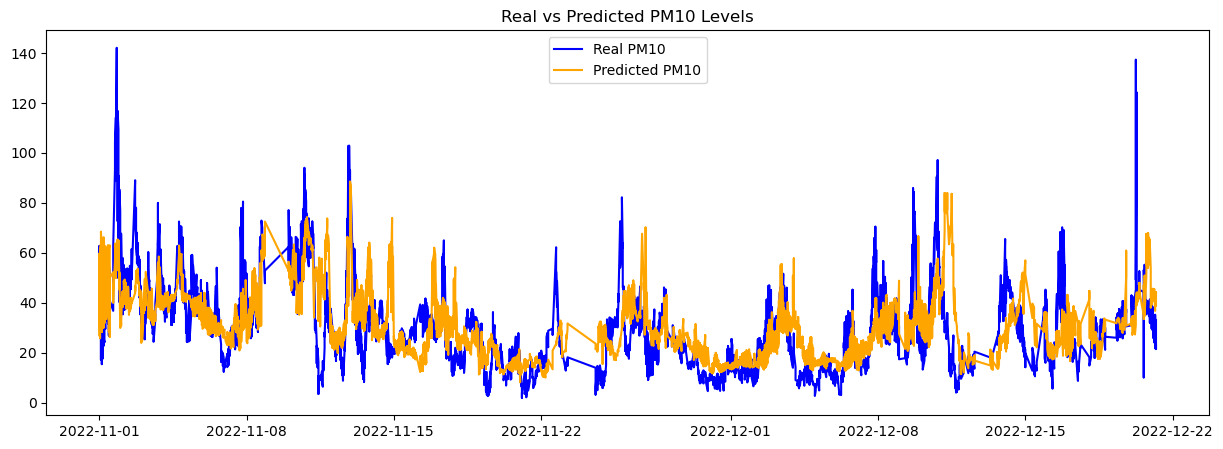

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 1️⃣ Preprocesare și Feature Engineering
data = pd.read_csv("../data/FinalDatasets/dataset_3stations_interpolated.csv", parse_dates=['start', 'end'])

# Adăugăm feature-uri utile
data['day_of_week'] = data['start'].dt.dayofweek
data['hour'] = data['start'].dt.hour
data['is_weekend'] = data['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)

# Sortăm după timp
data = data.sort_values(by='start')

# Calculăm mediile mobile
data['rolling_pm10_24h'] = data.groupby('location')['pm10'].transform(lambda x: x.rolling(window=24, min_periods=1).mean())
data['rolling_pm10_48h'] = data.groupby('location')['pm10'].transform(lambda x: x.rolling(window=48, min_periods=1).mean())

# ✅ Adăugăm și pentru NO2
data['rolling_no2_24h'] = data.groupby('location')['no2'].transform(lambda x: x.rolling(window=24, min_periods=1).mean())
data['rolling_no2_48h'] = data.groupby('location')['no2'].transform(lambda x: x.rolling(window=48, min_periods=1).mean())

# 2️⃣ Împărțire în Train și Test (80% - 20%)
train_data = data[data['start'] < '2022-11-01']
test_data = data[data['start'] >= '2022-11-01']

# Feature-uri pentru antrenare
features = [
    'temperature', 'humidity', 'wind_speed', 'pressure',
    'day_of_week', 'hour', 'is_weekend',
    'rolling_pm10_24h', 'rolling_pm10_48h',
    'rolling_no2_24h', 'rolling_no2_48h'
]

X_train = train_data[features]
y_train = train_data['pm10']
X_test = test_data[features]
y_test = test_data['pm10']

# 3️⃣ Antrenare model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 4️⃣ Predicție și evaluare
y_pred = model.predict(X_test)

print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))

# Plot
plt.figure(figsize=(15, 5))
plt.plot(test_data['start'], y_test, label='Real PM10', color='blue')
plt.plot(test_data['start'], y_pred, label='Predicted PM10', color='orange')
plt.legend()
plt.title('Real vs Predicted PM10 Levels')
plt.show()


Mean Absolute Error (MAE): 9.309495647016547
Root Mean Squared Error (RMSE): 12.874314554901197
R² Score: 0.4173210657764903


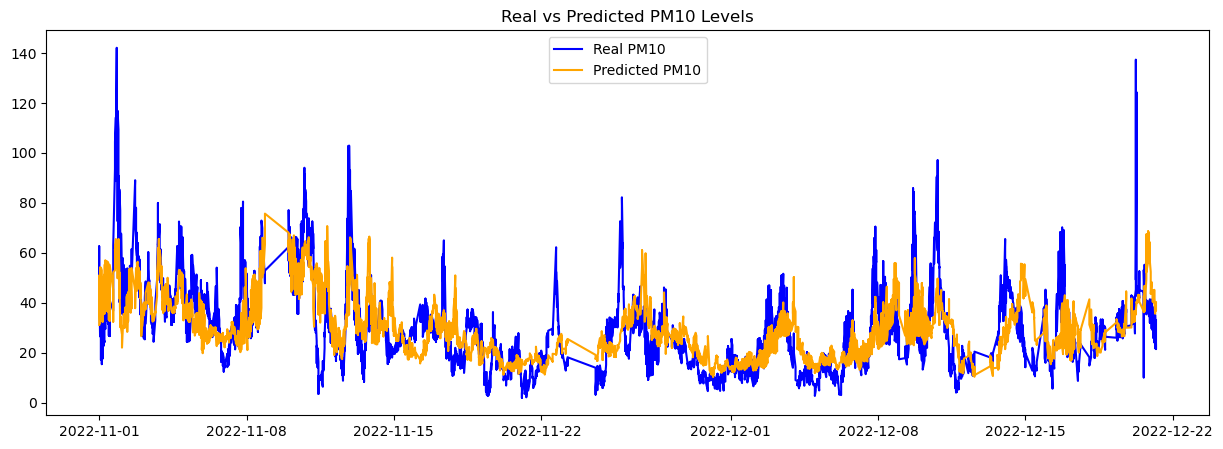

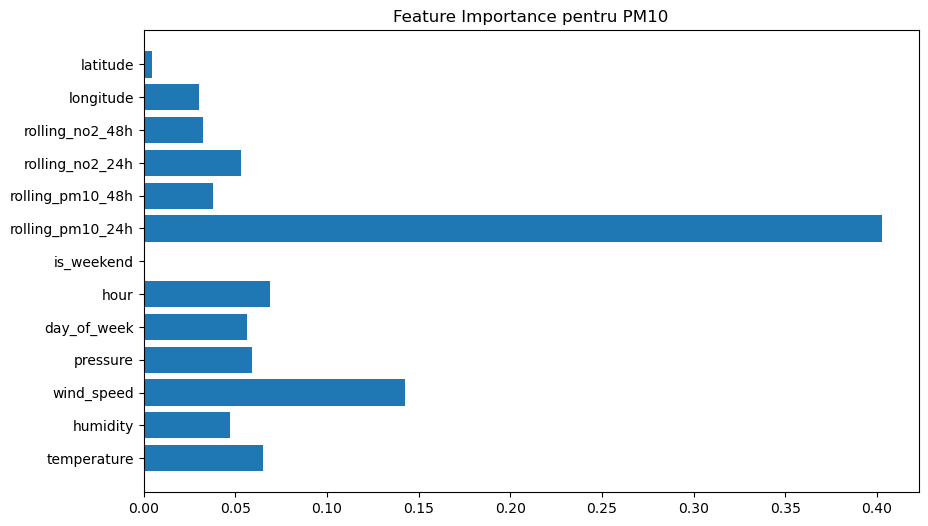

In [1]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 1️⃣ Preprocesare și Feature Engineering
data = pd.read_csv("../data/FinalDatasets/dataset_3stations_interpolated.csv", parse_dates=['start', 'end'])

# Adăugăm feature-uri utile
data['day_of_week'] = data['start'].dt.dayofweek
data['hour'] = data['start'].dt.hour
data['is_weekend'] = data['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)

# Sortăm după timp
data = data.sort_values(by='start')

# Calculăm mediile mobile
data['rolling_pm10_24h'] = data.groupby('location')['pm10'].transform(lambda x: x.rolling(window=24, min_periods=1).mean())
data['rolling_pm10_48h'] = data.groupby('location')['pm10'].transform(lambda x: x.rolling(window=48, min_periods=1).mean())
data['rolling_no2_24h'] = data.groupby('location')['no2'].transform(lambda x: x.rolling(window=24, min_periods=1).mean())
data['rolling_no2_48h'] = data.groupby('location')['no2'].transform(lambda x: x.rolling(window=48, min_periods=1).mean())

# 2️⃣ Împărțire în Train și Test (80% - 20%)
train_data = data[data['start'] < '2022-11-01']
test_data = data[data['start'] >= '2022-11-01']

# Feature-uri pentru antrenare
features = [
    'temperature', 'humidity', 'wind_speed', 'pressure',
    'day_of_week', 'hour', 'is_weekend',
    'rolling_pm10_24h', 'rolling_pm10_48h',
    'rolling_no2_24h', 'rolling_no2_48h',
    'longitude', 'latitude'
]

X_train = train_data[features]
y_train = train_data['pm10']
X_test = test_data[features]
y_test = test_data['pm10']

# 3️⃣ Antrenare model XGBoost
model = XGBRegressor(n_estimators=200, learning_rate=0.05, max_depth=5, random_state=42)
model.fit(X_train, y_train)

# 4️⃣ Predicție și evaluare
y_pred = model.predict(X_test)

print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))

# Plot
plt.figure(figsize=(15, 5))
plt.plot(test_data['start'], y_test, label='Real PM10', color='blue')
plt.plot(test_data['start'], y_pred, label='Predicted PM10', color='orange')
plt.legend()
plt.title('Real vs Predicted PM10 Levels')
plt.show()

# 🔍 Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(features, model.feature_importances_)
plt.title("Feature Importance pentru PM10")
plt.show()


In [4]:
## Feature Importance:
#Observăm că cele mai relevante feature-uri sunt:

# - rolling_pm10_24h și rolling_pm10_48h — ceea ce are sens, deoarece PM10 tinde să aibă o inerție și corelație temporală.
# - wind_speed — viteza vântului pare să aibă un impact semnificativ, ceea ce e logic, deoarece dispersia particulelor depinde de acest factor.
#- pressure și day_of_week — traficul și activitățile umane par să fie reflectate și în presiune atmosferică și în zilele săptămânii.

In [5]:
## Ce putem îmbunătăți?


# Feature Engineering Adițional:
# Putem introduce un feature pentru direcția vântului dacă avem aceste date.
# Indicatori de evenimente meteo (ploaie, furtună) dacă sunt disponibili.
# Model Tuning:
# Testăm mai multe valori pentru n_estimators, max_depth și learning_rate.
# Eventual, folosim GridSearchCV sau RandomizedSearchCV pentru optimizare.
# Time Series Split:
# Am făcut un split pe baza datei, dar putem aplica și un TimeSeriesSplit pentru validare cross-temporală.
# Stacked Models:
# Putem combina XGBoost cu LightGBM și RandomForest pentru a îmbunătăți predicția.